In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
revenus = [1800,1500,2200,3000,2172]
revenus_array=np.array(revenus)
print(revenus_array.dtype)
print(revenus_array[revenus_array<2000])



In [8]:
hugo = [21,1400,0]
richard = [54,2800,2]
emilie=[27,3700,3]
tbl=[hugo,richard,emilie]
print(np.array(tbl))

[[  21 1400    0]
 [  54 2800    2]
 [  27 3700    3]]


In [11]:
data = np.random.randint(1,10,size=(24,2))

In [12]:
data[:,1]

array([9, 5, 4, 7, 4, 8, 6, 5, 7, 1, 5, 6, 5, 6, 7, 2, 9, 9, 1, 7, 3, 4,
       6, 6])

In [14]:
a = np.linspace(5,10,11)

In [17]:
print(a[a% 2 == 0])

[ 6.  8. 10.]


In [18]:
b = np.array([[[1,2],[3,4]],[[6,7],[5,8]],[[9,10],[1,2]]])

In [20]:
print(b[2,:,:])

[[ 9 10]
 [ 1  2]]


In [25]:
data_csv = pd.read_csv('clients.csv')
data_csv.head()

,identifiant,email,nom,genre
0,0,LaurentDagenais@rhyta.com,Laurent Dagenais,M
1,1,GuyMarois@fleckens.hu,Guy Marois,M
2,2,BeaufortLesage@einrot.com,Beaufort Lesage,M
3,3,RussellDurand@armyspy.com,Russell Durand,M
4,4,AlexisRiel@rhyta.com,Alexis Riel,M


In [26]:
data_json=pd.read_json('clients.json')
data_json.head()

,identifiant,email,nom,genre
0,0,LaurentDagenais@rhyta.com,Laurent Dagenais,M
1,1,GuyMarois@fleckens.hu,Guy Marois,M
2,2,BeaufortLesage@einrot.com,Beaufort Lesage,M
3,3,RussellDurand@armyspy.com,Russell Durand,M
4,4,AlexisRiel@rhyta.com,Alexis Riel,M


In [27]:
data_excel = pd.read_excel('clients.xlsx')
data_excel.head()

,identifiant,email,nom,genre
0,0,LaurentDagenais@rhyta.com,Laurent Dagenais,M
1,1,GuyMarois@fleckens.hu,Guy Marois,M
2,2,BeaufortLesage@einrot.com,Beaufort Lesage,M
3,3,RussellDurand@armyspy.com,Russell Durand,M
4,4,AlexisRiel@rhyta.com,Alexis Riel,M


In [28]:
data_csv.shape

(228, 4)

In [30]:
data_csv.dtypes

identifiant     int64
email          object
nom            object
genre          object
dtype: object

In [3]:
clients = pd.read_json('clients.json')


In [4]:
print(clients['email'])

0            LaurentDagenais@rhyta.com
1                GuyMarois@fleckens.hu
2            BeaufortLesage@einrot.com
3            RussellDurand@armyspy.com
4                 AlexisRiel@rhyta.com
                    ...               
223    ClaudeDandonneau@jourrapide.com
224      ApollineMichaud@superrito.com
225         PascalineBeaudry@rhyta.com
226       FleurCaouette@jourrapide.com
227        FrancisMasse@jourrapide.com
Name: email, Length: 228, dtype: object


In [6]:
prets = pd.read_csv('https://raw.githubusercontent.com/OpenClassrooms-Student-Center/fr-4452741-decouvrez-les-librairies-python-pour-la-data-science/main/data/prets_final.csv')
prets.head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux_interet,taux_endettement,cout_total,benefices,risque
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168,30.80,271212.0,131.99,Non
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701,4.52,15360.0,23.69,Non
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173,23.50,374355.0,182.97,Non
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972,29.50,132609.6,53.71,Non
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014,34.80,105485.4,44.57,Non


In [7]:
type_agregation = prets.groupby('type').size().reset_index()
type_agregation.columns = ['type','nombre']

<BarContainer object of 2 artists>

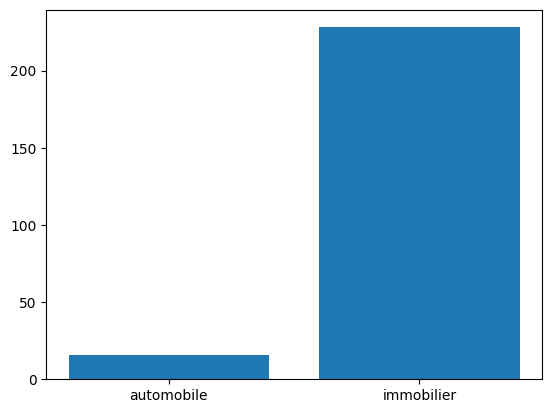

In [8]:
plt.bar(type_agregation['type'],type_agregation['nombre'])

([<matplotlib.patches.Wedge at 0x7f91482503a0>,
 [Text(1.0767412561950618, 0.22500726034392846, 'automobile'),
  Text(-1.0767412456617107, -0.22500731074982402, 'immobilier')],
 [Text(0.5873134124700337, 0.12273123291487005, '6.56%'),
  Text(-0.5873134067245693, -0.1227312604089949, '93.44%')])

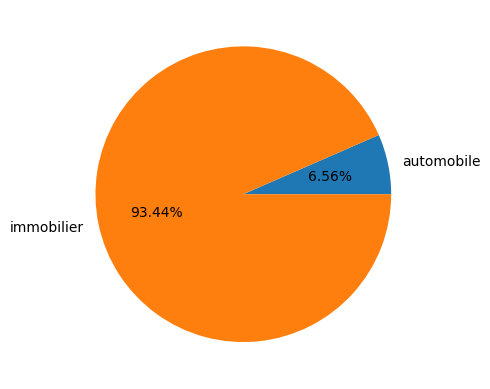

In [10]:
plt.pie(x=type_agregation['nombre'], labels=type_agregation['type'], autopct='%.2f%%')

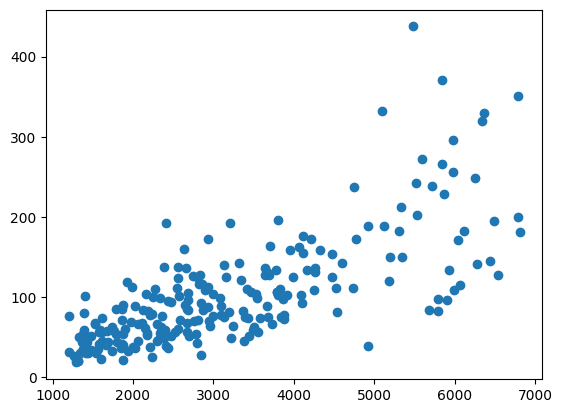

In [11]:
prets_imo = prets.loc[prets['type']=='immobilier',:]
plt.scatter(prets_imo['revenu'],prets_imo['benefices'])

findfont: Font family '' not found.
findfont: Font family '' not found.
findfont: Font family '' not found.
findfont: Font family '' not found.
findfont: Font family '' not found.


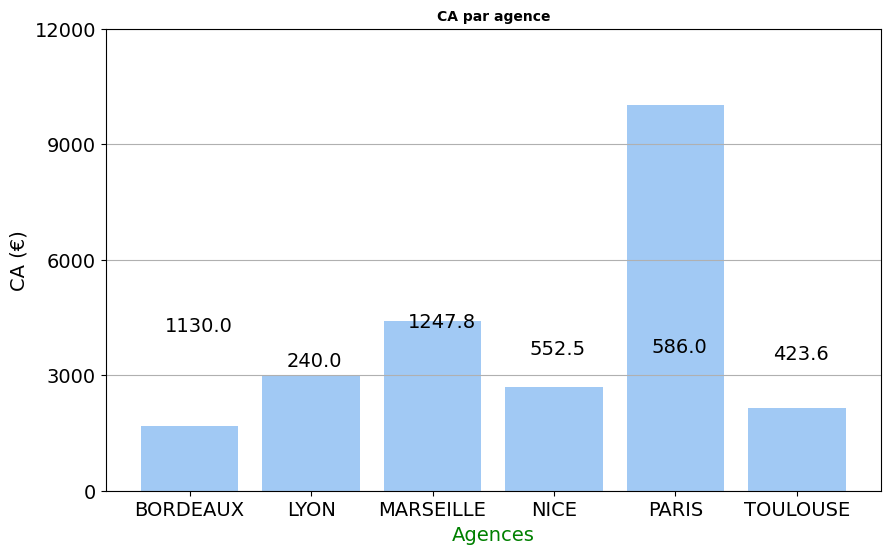

In [53]:
benef_ville=prets.groupby('ville')['benefices'].sum().reset_index()
plt.figure(figsize=(10,6))
plt.bar(benef_ville['ville'],benef_ville['benefices'])
sbn.set_palette('dark')

plt.title('CA par agence', fontname='', fontsize=10, fontweight='bold')
plt.xlabel('Agences', color='green')
plt.ylabel('CA (€)')
plt.grid(axis='y')
plt.ylim(0,12000)
plt.yticks([0,3000,6000,9000,12000])
ca = prets['remboursement'].tolist()
for i in range(6):
    plt.text(i-0.2,ca[i]+3000,round(ca[i],1))
plt.show()

In [35]:
CA = pd.read_csv('https://raw.githubusercontent.com/OpenClassrooms-Student-Center/fr-4452741-decouvrez-les-librairies-python-pour-la-data-science/main/data/CA.csv')
CA['date'] = pd.to_datetime(CA['date'])
CA.head()

,date,immobilier,automobile,consommation
0,2021-01-01,10439,5096,3808
1,2021-02-01,11266,5146,5838
2,2021-03-01,11315,5276,5601
3,2021-04-01,11456,5067,3639
4,2021-05-01,10816,4937,5273


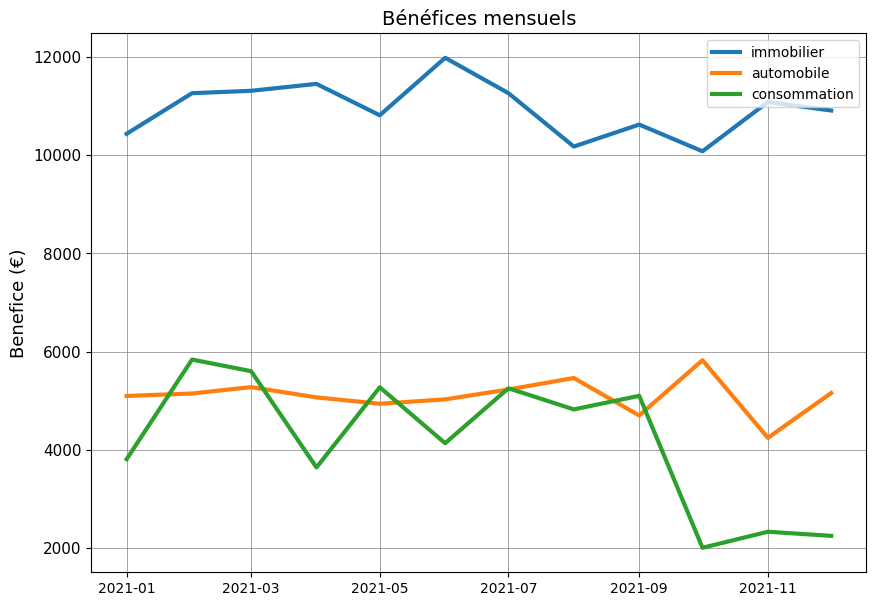

In [37]:
plt.figure(figsize=(10, 7))
plt.plot(CA['date'], CA['immobilier'], label='immobilier', linewidth=3)
plt.plot(CA['date'], CA['automobile'], label='automobile', linewidth=3)
plt.plot(CA['date'], CA['consommation'], label='consommation', linewidth=3)
plt.legend(loc='upper right')
plt.ylabel('Benefice (€)', fontsize=13)
plt.yticks(fontsize=11)
plt.title("Bénéfices mensuels", fontsize=14)
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()

<Axes: xlabel='revenu', ylabel='taux_endettement'>

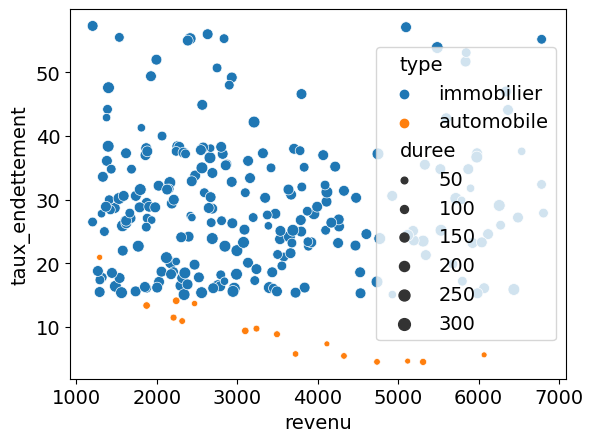

In [47]:
sbn.scatterplot(data=prets, x='revenu', y='taux_endettement',hue='type',size='duree')


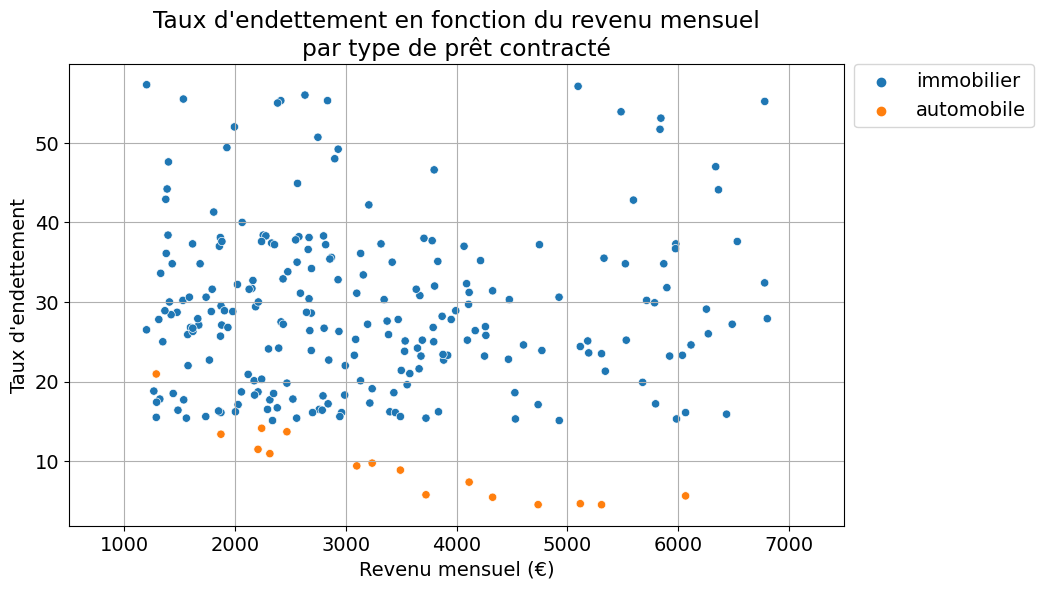

In [46]:
plt.figure(figsize=(10,6))

plt.rcParams.update({'font.size': 14})

sbn.scatterplot(data=prets, x='revenu', y='taux_endettement', hue='type')

plt.ylabel("Taux d'endettement")

plt.xlabel('Revenu mensuel (€)')

plt.grid()

plt.xlim(500, 7500)

plt.legend(bbox_to_anchor=(1, 1.02))

plt.title("Taux d'endettement en fonction du revenu mensuel\npar type de prêt contracté")

plt.show()

<Axes: xlabel='ville', ylabel='remboursement'>

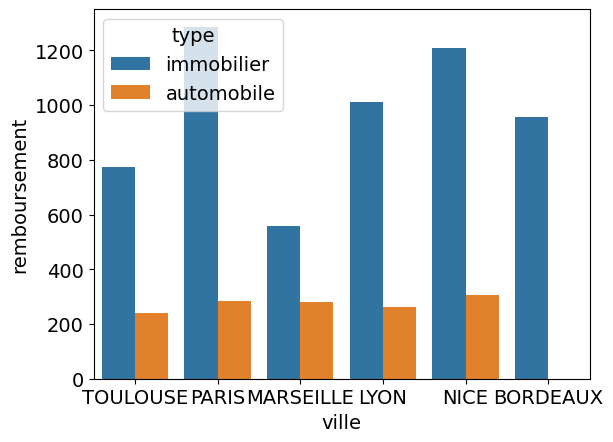

In [50]:
sbn.barplot(data=prets,x='ville', y ='remboursement', errorbar=None, estimator=np.mean, hue='type')

In [56]:
iris = sbn.load_dataset('iris')

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

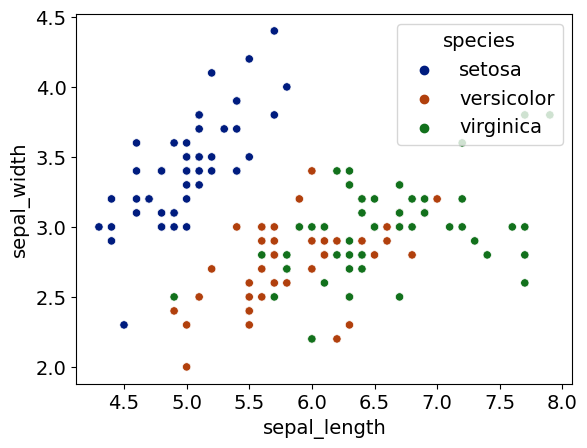

In [57]:
sbn.scatterplot(data=iris, x='sepal_length',y='sepal_width',hue='species')

<Axes: xlabel='species', ylabel='sepal_width'>

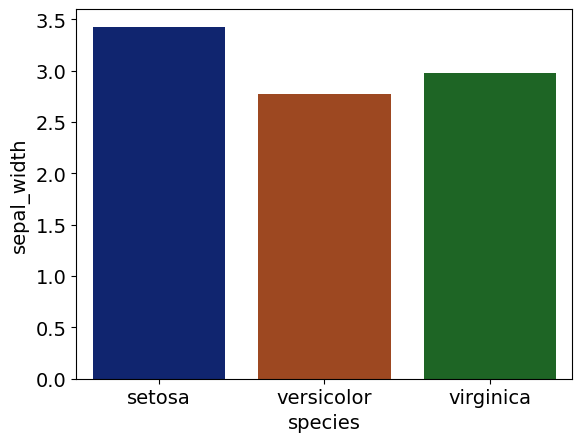

In [58]:
sbn.barplot(data=iris,x='species',y='sepal_width',errorbar=None,estimator=np.mean)

In [4]:
# exo : linear regression unidimensionnelle avec pandas et numpy
house_data = pd.read_csv('house.csv')
house_data.head()
house_data.shape

(545, 2)

In [7]:
house_data=house_data[house_data['loyer']<10000] #elimination des outliers 

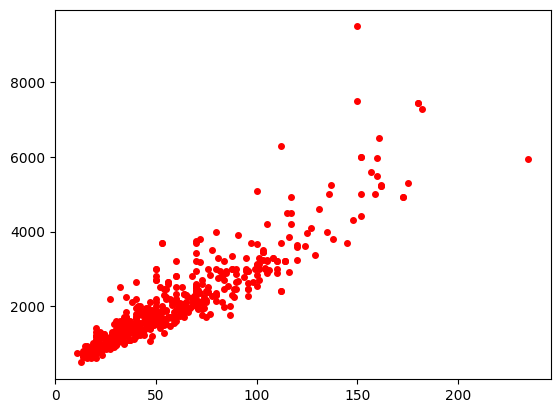

In [9]:
plt.plot(house_data['surface'],house_data['loyer'],'ro',markersize=4)
plt.show()

In [12]:
X = np.matrix([np.ones(house_data.shape[0]),house_data['surface']]).T
y=np.matrix(house_data['loyer']).T

matrix([[1330],
        [1400],
        [ 904],
        [ 955],
        [2545],
        [ 970],
        [1560],
        [1960],
        [2000],
        [2600]])

In [13]:
theta=np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y) #sol de l'équation de minimisation : theta = (Xt*X)^(-1)*Xt*y

In [14]:
theta

matrix([[266.45460292],
        [ 30.66119596]])

In [16]:
print (theta.item(0)+theta.item(1)*30) # calcul de l'estimation du loyer pour une surface 30mcarré

1186.2904817537717


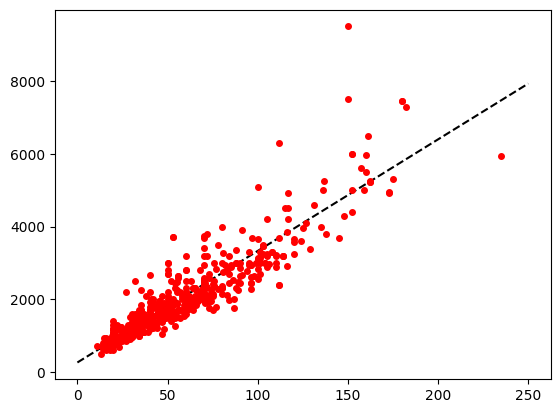

In [18]:
plt.plot([0,250],[theta.item(0),theta.item(0)+250*theta.item(1)],linestyle='--',c='#000000')
plt.plot(house_data['surface'],house_data['loyer'],'ro',markersize=4)
plt.show()

In [26]:
# echantillonnage du jeu de données selon la proportion de 0.8 que l'on alouera aux données d'entrainement 
X_train,X_test,y_train,y_test =train_test_split(X,y,train_size=0.8)

In [ ]:
# methode k-NN (N plus proches voisins)
mnist=fetch_openml('mnist_784',version=1)